In [2]:
import os
import sys
sys.path.append(os.path.abspath("../src"))  # zodat Python src als modulepad herkent
from pos_analyse_mt import evaluate_pos

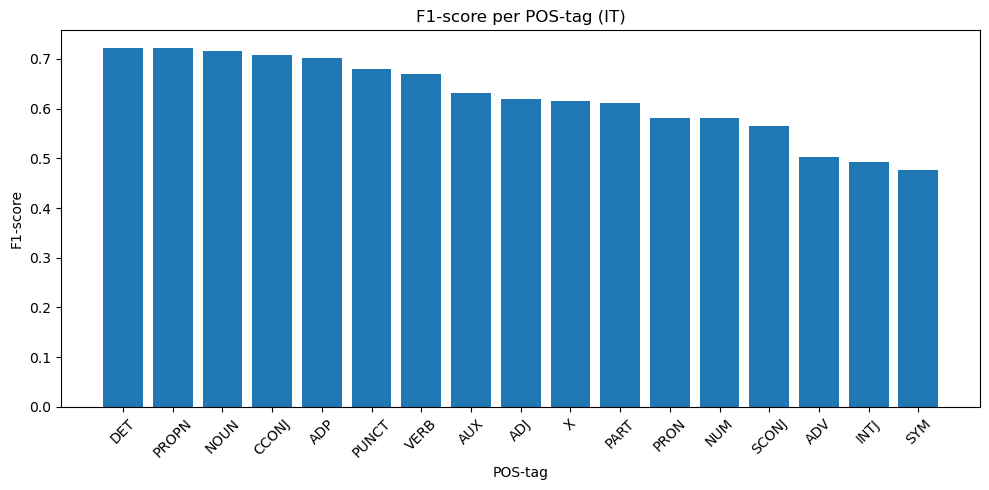

,POS,Precision,Recall,F1,Support
5,DET,0.717391,0.725275,0.721311,455
11,PROPN,0.724305,0.718225,0.721252,834
7,NOUN,0.720215,0.709848,0.714994,1320
4,CCONJ,0.698718,0.717105,0.707792,152
1,ADP,0.704878,0.699758,0.702309,413
12,PUNCT,0.664234,0.694656,0.679104,131
15,VERB,0.677474,0.661667,0.669477,600
3,AUX,0.619565,0.644068,0.631579,177
0,ADJ,0.617162,0.621262,0.619205,301
16,X,0.631579,0.600000,0.615385,40


In [3]:
df_it = evaluate_pos(
    "/Users/sedatgunay/Desktop/MT-DATA/data/it/test.en.tag",
    "/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_it_knn_8k_10T_7e-1lambda_beam5/hyp.eval_ready.tag",
    domain_name="IT"
)

df_it

df_it.to_csv("results/pos_it_scores.csv", index=False)

df_it

In [4]:
!sacrebleu /Users/sedatgunay/Desktop/MT-DATA/data/it/test.en \
    -i /Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_it_knn_8k_10T_7e-1lambda_beam5/de-en.checkpoint_last.test.translation_knn.beam-5..hyp.eval_ready \
    -m bleu -b -w 2 --sentence-level \
    > results/bleu_scores_it.txt

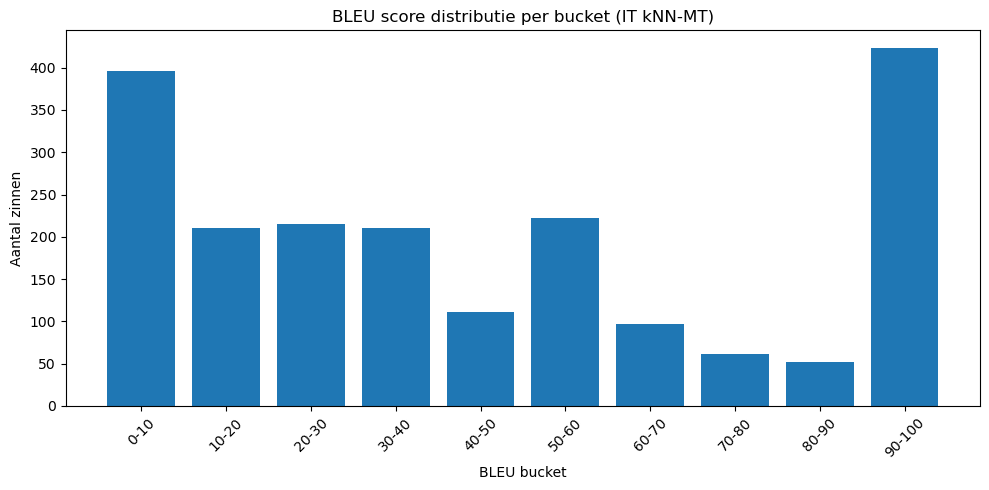

In [5]:
from analysis import analyze_bleu_buckets_single_system

bleu_it = analyze_bleu_buckets_single_system("results/bleu_scores_it.txt", system_name="IT kNN-MT")

In [9]:
import pandas as pd

# Laad BLEU-scores
with open("results/bleu_scores_it.txt") as f:
    scores = [float(line.strip()) for line in f]

# Vind indices van de laagste 5% (BLEU-outliers)
n = int(len(scores) * 0.05)
low_idx = sorted(range(len(scores)), key=lambda i: scores[i])[:n]

In [11]:
with open("/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_it_knn_8k_10T_7e-1lambda_beam5/de-en.checkpoint_last.test.translation_knn.beam-5..hyp.eval_ready") as f:
    hyps = [line.strip() for line in f]
with open("/Users/sedatgunay/Desktop/MT-DATA/data/it/test.en") as f:
    refs = [line.strip() for line in f]

for i in low_idx:
    print(f"[{i}]")
    print("REF:", refs[i])
    print("HYP:", hyps[i])
    print("BLEU:", scores[i])
    print()

[6]
REF: Paste clipboard
HYP: Insert Clipboard
BLEU: 0.0

[14]
REF: User data
HYP: Document.
BLEU: 0.0

[20]
REF: femtoliters
HYP: Femtoliterunit synonyms for match user input
BLEU: 0.0

[26]
REF: URI
HYP: Day View
BLEU: 0.0

[45]
REF: Tien Giang
HYP: PERCENTILE
BLEU: 0.0

[51]
REF: continue if stopped
HYP: Edit Send Signal
BLEU: 0.0

[52]
REF: launch feedback
HYP: Application Start Display
BLEU: 0.0

[87]
REF: empty documents
HYP: Blank Documents
BLEU: 0.0

[88]
REF: 1.60.0
HYP: 1.60
BLEU: 0.0

[102]
REF: The next option down, labeled Enable keyboard, determines if the keyboard shortcuts will work while playing the game. The default keyboard shortcuts are given in, and can be changed by selecting Settings Configure Shortcuts....
HYP: & kmines settings;
BLEU: 0.0

[131]
REF: setBfree
HYP: SetBfree
BLEU: 0.0

[132]
REF: Lake Erie
HYP: Erieseeusa.kgm
BLEU: 0.0

[135]
REF: Utsunomiya
HYP: Utsunomiyajapan. kgm
BLEU: 0.0

[138]
REF: "Hg
HYP: * n
BLEU: 0.0

[142]
REF: Wir besitzen einen Comp

In [16]:
import pandas as pd

# Laad scores
with open("results/bleu_scores_it.txt") as f:
    scores = [float(line.strip()) for line in f]

# Laad POS-tags
with open("/Users/sedatgunay/Desktop/MT-DATA/outputs/eval_model_it_knn_8k_10T_7e-1lambda_beam5/hyp.eval_ready.tag") as f:
    tags = [line.strip().split() for line in f]

# Selecteer laagste 5% indexen
n = int(len(scores) * 0.05)
outlier_idx = sorted(range(len(scores)), key=lambda i: scores[i])[:n]

# Verzamel POS-tags van outliers
outlier_tags = [tags[i] for i in outlier_idx]
flat_tags = [tag for line in outlier_tags for tag in line]

# tags = lijst met lijstjes van POS per zin (al geladen bij stap 1)
all_flat_tags = [tag for line in tags for tag in line]

In [17]:
from collections import Counter

tag_counts = Counter(flat_tags)
df_pos_outliers = pd.DataFrame(tag_counts.items(), columns=["POS", "Count"])
df_pos_outliers = df_pos_outliers.sort_values(by="Count", ascending=False)
print(df_pos_outliers)

      POS  Count
0   PROPN     72
1    NOUN     69
7    VERB     19
2     ADP     13
5     ADJ     12
8     DET      7
3     NUM      5
9    PART      4
10   PRON      4
12    ADV      3
4   CCONJ      2
6   PUNCT      2
11    AUX      1
13      X      1


In [20]:
df_outlier = pd.DataFrame(Counter(flat_tags).items(), columns=["POS", "Outlier"])
df_merged = df_outlier.merge(df_total, on="POS")

# Voeg percentage kolom toe
df_merged["Outlier %"] = 100 * df_merged["Outlier"] / df_merged["Total"]

# Sorteer op relatieve oververtegenwoordiging
df_merged = df_merged.sort_values(by="Outlier %", ascending=False)

df_merged

,POS,Outlier,Total,Outlier %
0,PROPN,72,2369,3.039257
1,NOUN,69,4647,1.484829
3,NUM,5,407,1.228501
5,ADJ,12,1099,1.091902
9,PART,4,415,0.963855
7,VERB,19,2210,0.859729
12,ADV,3,355,0.845070
2,ADP,13,1719,0.756254
13,X,1,143,0.699301
10,PRON,4,783,0.510856


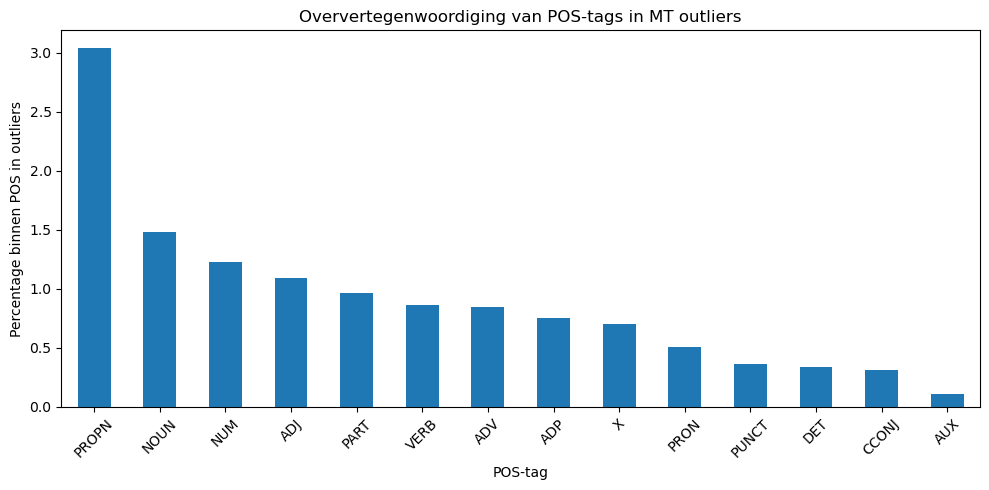

In [21]:
df_merged.plot(x="POS", y="Outlier %", kind="bar", figsize=(10,5), legend=False)
plt.title("Oververtegenwoordiging van POS-tags in MT outliers")
plt.ylabel("Percentage binnen POS in outliers")
plt.xlabel("POS-tag")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

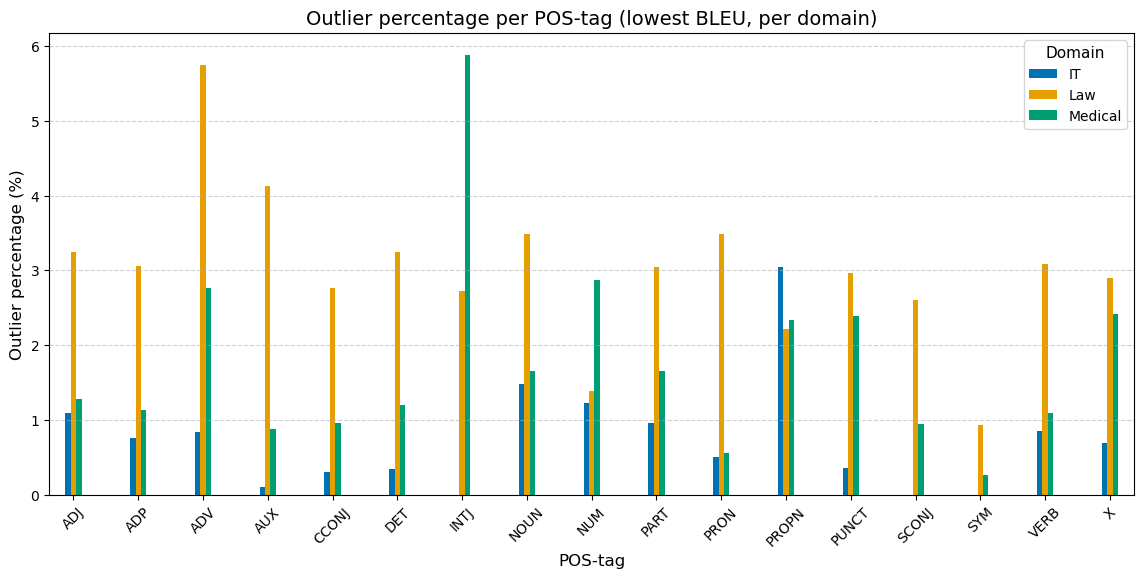

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# ✏️ Vervang deze met je data (zoals je eerder gebruikte)
df_it = pd.DataFrame({
    "POS": ["PROPN", "NOUN", "NUM", "ADJ", "PART", "VERB", "ADV", "ADP", "X", "PRON", "PUNCT", "DET", "CCONJ", "AUX"],
    "Outlier %": [3.04, 1.48, 1.23, 1.09, 0.96, 0.86, 0.84, 0.76, 0.70, 0.51, 0.36, 0.34, 0.31, 0.11],
    "Domain": "IT"
})

df_med = pd.DataFrame({
    "POS": ["INTJ", "NUM", "ADV", "X", "PUNCT", "PROPN", "PART", "NOUN", "ADJ", "DET", "ADP", "VERB", "CCONJ", "SCONJ", "AUX", "PRON", "SYM"],
    "Outlier %": [5.88, 2.87, 2.77, 2.42, 2.39, 2.34, 1.66, 1.66, 1.28, 1.20, 1.14, 1.10, 0.96, 0.95, 0.88, 0.56, 0.27],
    "Domain": "Medical"
})

df_law = pd.DataFrame({
    "POS": ["ADV", "AUX", "NOUN", "PRON", "DET", "ADJ", "VERB", "ADP", "PART", "PUNCT", "X", "CCONJ", "INTJ", "SCONJ", "PROPN", "NUM", "SYM"],
    "Outlier %": [5.75, 4.13, 3.49, 3.48, 3.25, 3.24, 3.09, 3.06, 3.05, 2.97, 2.90, 2.77, 2.72, 2.61, 2.22, 1.39, 0.93],
    "Domain": "Law"
})

# Combineer
df_all = pd.concat([df_it, df_med, df_law], ignore_index=True)

# Zet op lange vorm → pivot voor barplot
pivot_df = df_all.pivot_table(index="POS", columns="Domain", values="Outlier %")

# Sorteer POS-tags alfabetisch voor consistente weergave
pivot_df = pivot_df.sort_index()

# Plot
pivot_df.plot(
    kind="bar", 
    figsize=(14, 6), 
    color=["#0072B2", "#E69F00", "#009E73"],
    width=0.25
)
plt.title("Outlier percentage per POS-tag (lowest BLEU, per domain)", fontsize=14)
plt.ylabel("Outlier percentage (%)", fontsize=12)
plt.xlabel("POS-tag", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title="Domain", fontsize=10, title_fontsize=11)

plt.show()


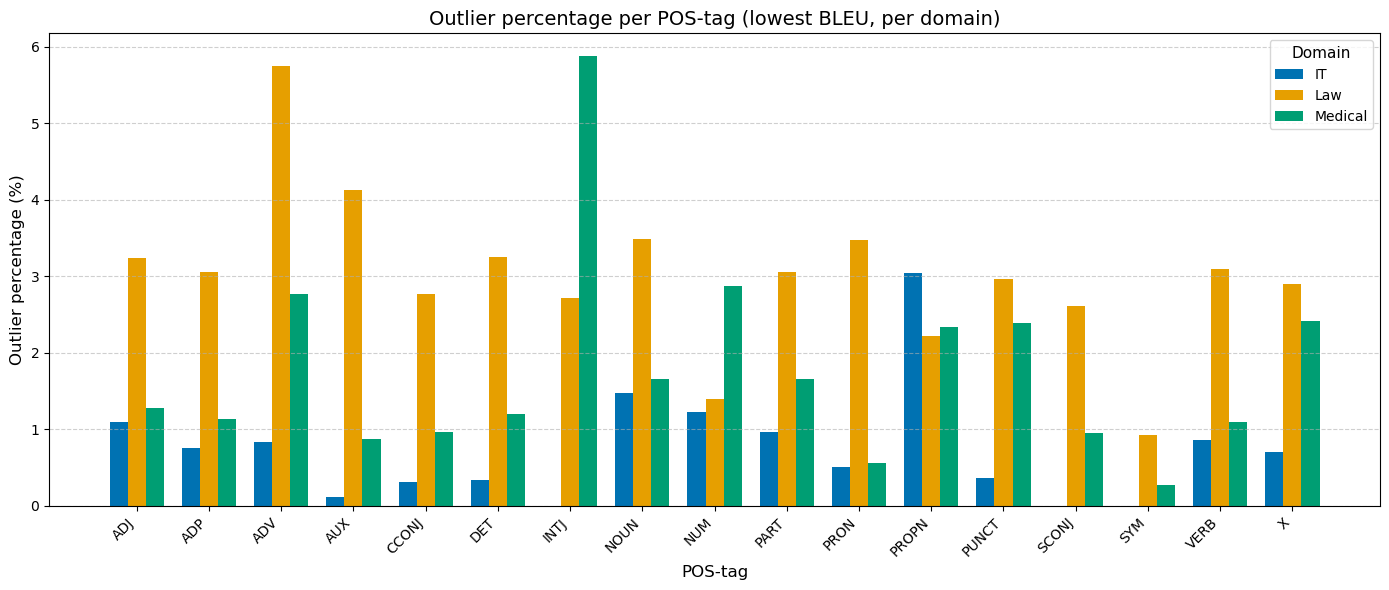

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Stel: pivot_df bevat je gegevens met index=POS-tags en kolommen=IT, Law, Medical
labels = pivot_df.index.tolist()
x = np.arange(len(labels))  # POS-tag indices

width = 0.25  # Bar breedte

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - width,     pivot_df['IT'],     width, label='IT', color="#0072B2")       # blauw
ax.bar(x,             pivot_df['Law'],    width, label='Law', color="#E69F00")      # oranje
ax.bar(x + width,     pivot_df['Medical'], width, label='Medical', color="#009E73") # groen

ax.set_ylabel("Outlier percentage (%)", fontsize=12)
ax.set_xlabel("POS-tag", fontsize=12)
ax.set_title("Outlier percentage per POS-tag (lowest BLEU, per domain)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=10)
ax.grid(True, axis='y', linestyle="--", alpha=0.6)
ax.legend(title="Domain", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()